In [44]:
# Standard Library Imports
import pandas as pd
import re

# Third-party Library Imports
import requests
from bs4 import BeautifulSoup
import praw
import nltk
import numpy as np
import matplotlib.pyplot as plt
import concurrent.futures
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import time
import itertools
from itertools import combinations
from collections import defaultdict
from nltk.stem import WordNetLemmatizer
import datetime
from nltk.stem import PorterStemmer
from collections import Counter
from nltk.util import bigrams

# Custom Functions or Classes (if applicable)

In [2]:
# Set pandas display options to show the entire content of the "Post Text" column
pd.set_option('display.max_colwidth', None)

In [3]:
# Initialize your Reddit API client
redditscrapper = praw.Reddit(
    client_id='mTKAc7piwaoiD3fvkhY7qA',
    client_secret='GdT29i_cBYDTJwb0eExYEh6prVceGg',
    user_agent='(REDACTED NAME HERE)'
)

In [4]:
# List of subreddit names to scrape
subreddit_names = ["intermittentfasting", "AnorexiaNervosa"]

In [5]:
# Dictionary to store post data
posts_dict = {
    "Title": [],
    "Post Text": [],
    "ID": [],
    "Score": [],
    "Total Comments": [],
    "Post URL": [],
    "Subreddit": [],
    "Post Type": []  # Add a column for post type (new, hot, top, rising)
}

In [6]:
# Set to keep track of collected post IDs
collected_post_ids = set()

In [7]:
# Iterate through the subreddit names to test accessibility
for subreddit_name in subreddit_names:
    reddit_url = f"https://www.reddit.com/r/{subreddit_name}"
    response = requests.get(reddit_url)

    if response.status_code == 200:
        print(f"Success! The subreddit at {reddit_url} is accessible.")
    else:
        print(f"Error! The subreddit at {reddit_url} returned a status code of {response.status_code}.")

Success! The subreddit at https://www.reddit.com/r/intermittentfasting is accessible.
Success! The subreddit at https://www.reddit.com/r/AnorexiaNervosa is accessible.


In [8]:
# Dictionary to store post data
posts_dict = {
    "Title": [],
    "Post Text": [],
    "ID": [],
    "Score": [],
    "Total Comments": [],
    "Post URL": [],
    "Subreddit": [],
    "Post Type": [],  # Add a column for post type (new, hot, top, rising)
    "Time uploaded": []
}

# Set to keep track of collected post IDs
collected_post_ids = set()

# Iterate through the subreddit names and post types to fetch and collect posts
for subreddit_name in subreddit_names:
    subreddit = redditscrapper.subreddit(subreddit_name)
    post_types = ["hot", "new", "top", "rising"]  # You can add more if needed
    
    for post_type in post_types:
        if post_type == "new":
            posts = subreddit.new(limit=10000)  # Fetch new posts
        elif post_type == "hot":
            posts = subreddit.hot(limit=10000)  # Fetch hot posts
        elif post_type == "top":
            posts = subreddit.top(limit=10000)  # Fetch top posts
        elif post_type == "rising":
            posts = subreddit.rising(limit=10000)  # Fetch rising posts
        
        for post in posts:
            if post.id not in collected_post_ids:
                collected_post_ids.add(post.id)
                posts_dict["Title"].append(post.title)
                posts_dict["Post Text"].append(post.selftext)
                posts_dict["ID"].append(post.id)
                posts_dict["Score"].append(post.score)
                posts_dict["Total Comments"].append(post.num_comments)
                posts_dict["Post URL"].append(post.url)
                posts_dict["Subreddit"].append(subreddit_name)
                posts_dict["Post Type"].append(post_type)
                time_uploaded = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
                posts_dict["Time uploaded"].append(time_uploaded)

# Create a DataFrame from the collected data
all_posts = pd.DataFrame(posts_dict)

# Save the data to a CSV file
all_posts.to_csv("reddit_posts.csv", index=False)

# Print a summary of the collected data
print(f"Total number of posts collected: {len(all_posts)}")
all_posts.head()

Total number of posts collected: 3960


,Title,Post Text,ID,Score,Total Comments,Post URL,Subreddit,Post Type,Time uploaded
0,Daily Fasting Check-in!,"* **Type** of fast (water, juice, smoking, etc.)\n* **Context** of fast (start, end, day x of y, etc.)\n* **Length** of fast (8 hours, 3 days, etc.)\n* **Why?** What you hope to accomplish with your fast\n* **Notes** How is it going so far? Any concerns? Insights to share?\n\nBe sure to check back often as comments get posted throughout the day. Sort comments by ""new"" to be sure the newer comments get some love as well.",16o7z6r,2,8,https://www.reddit.com/r/intermittentfasting/comments/16o7z6r/daily_fasting_checkin/,intermittentfasting,hot,2023-09-22 11:24:00
1,F/29/5’8” [246 > 134 = 112lbs]. I’ve been maintaining for a couple months now. AMA about IF and weight loss,,16ooxjz,1195,93,https://i.redd.it/u50ew0vlunpb1.jpg,intermittentfasting,hot,2023-09-22 11:24:00
2,222 to 195 in 6 months,"Besides the weight I have zero aches and pains, can breathe better and my medical blood work went from 4 red flags to 0.",16ojkho,814,32,https://i.redd.it/espsmrohsmpb1.jpg,intermittentfasting,hot,2023-09-22 11:24:00
3,50 lbs down - 3 months,Started IF on June 19th and have now passed the 50lb mark this morning. Started on 16:8 eating breakfast and lunch only. Slowly moved up to 19:5. Exercise 2-3 days a week with either rowing or walking. I am using a eufy scale to weigh each morning and then manually measure every Sunday. I don't have a strict diet but I am trying to avoid as much sugar as possible. \n\nSW: 305\nCW: 255\nGW: 220,16ovnm1,177,22,https://www.reddit.com/gallery/16ovnm1,intermittentfasting,hot,2023-09-22 11:24:00
4,1 year of loving myself more and gains..,"L: cw- 183lbs R: 209lbs (sw 220lbs; May 2022)\n\nThis time last year I was down 10 ish pounds so I bought this set and did a photo shoot coz I was so happy with the results. Memory came up today so I decided to do a side by side and my goodness.. the happiness and healthiness is astounding. Still lots to go; no GW just more lean and fit and muscular. Whatever number that is. But according to fitness stuffs, 0% fat is 120 so I’m aiming around 140/150",16ogjn2,121,6,https://www.reddit.com/gallery/16ogjn2,intermittentfasting,hot,2023-09-22 11:24:00


In [9]:
# Define a function to check if a post is an image-only post
def is_image_only_post(post):
    # Check if the post's content (Post Text) is empty (no text) and the URL is an image or an image-hosting site
    return not post["Post Text"] and post["Post URL"].endswith(('.jpg', '.jpeg', '.png', '.gif', '.gifv', '.webp'))

# Apply the function to the DataFrame to create a Boolean mask
image_only_mask = all_posts.apply(is_image_only_post, axis=1)

# Filter out image-only posts
filtered_dataframe = all_posts[~image_only_mask]
print(f"Total number of posts after filter collected: {len(filtered_dataframe)}")

Total number of posts after filter collected: 2733


In [10]:
# Create a new DataFrame with the selected columns
selected_columns = ["Title", "Post Text", "Subreddit"]
filtered_columns_dataframe = filtered_dataframe[selected_columns]
# Save the data to a CSV file
filtered_columns_dataframe.to_csv("reddit_posts (no image-only post).csv", index=False)
filtered_columns_dataframe.head()

,Title,Post Text,Subreddit
0,Daily Fasting Check-in!,"* **Type** of fast (water, juice, smoking, etc.)\n* **Context** of fast (start, end, day x of y, etc.)\n* **Length** of fast (8 hours, 3 days, etc.)\n* **Why?** What you hope to accomplish with your fast\n* **Notes** How is it going so far? Any concerns? Insights to share?\n\nBe sure to check back often as comments get posted throughout the day. Sort comments by ""new"" to be sure the newer comments get some love as well.",intermittentfasting
2,222 to 195 in 6 months,"Besides the weight I have zero aches and pains, can breathe better and my medical blood work went from 4 red flags to 0.",intermittentfasting
3,50 lbs down - 3 months,Started IF on June 19th and have now passed the 50lb mark this morning. Started on 16:8 eating breakfast and lunch only. Slowly moved up to 19:5. Exercise 2-3 days a week with either rowing or walking. I am using a eufy scale to weigh each morning and then manually measure every Sunday. I don't have a strict diet but I am trying to avoid as much sugar as possible. \n\nSW: 305\nCW: 255\nGW: 220,intermittentfasting
4,1 year of loving myself more and gains..,"L: cw- 183lbs R: 209lbs (sw 220lbs; May 2022)\n\nThis time last year I was down 10 ish pounds so I bought this set and did a photo shoot coz I was so happy with the results. Memory came up today so I decided to do a side by side and my goodness.. the happiness and healthiness is astounding. Still lots to go; no GW just more lean and fit and muscular. Whatever number that is. But according to fitness stuffs, 0% fat is 120 so I’m aiming around 140/150",intermittentfasting
5,I decided who I wanted to be and I became her 💅🏽,"So a little background: I’m 39, have birthed two children and at 5’2, used to weigh 220 lbs for about a decade. I’m sitting around 150 lbs right now. It’s been almost 3 years since I started this intermittent fasting lifestyle and it’s the first time I didn’t gain ALL OF the weight back plus more. But I did fall off a bit last year and gained back about 25 lbs, 20 of which I’ve lost again. That regain did teach me something though. About how to handle stress. About not giving up when there are setbacks. About being grateful for every stage of the journey you’re at. I’ve currently been doing mostly a 20/4 schedule but eating whatever I want to satiety within my window… and the rest of the time I’m just chillin’. 😎",intermittentfasting


In [15]:
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\weege\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\weege\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\weege\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\weege\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
# Get the list of English stopwords
stop_words = set(stopwords.words("english"))

# Function to filter out stopwords
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

# Apply the function to the "Title" and "Post Text" columns using .loc
filtered_columns_dataframe.loc[:, "Stopword Dropped Title"] = filtered_columns_dataframe["Title"].apply(remove_stopwords)
filtered_columns_dataframe.loc[:, "Stopword Dropped Post Text"] = filtered_columns_dataframe["Post Text"].apply(remove_stopwords)

# Create a clean copy of the DataFrame with the dropped columns
dropped_filtered_columns_dataframe = filtered_columns_dataframe.drop(columns=["Title", "Post Text"]).copy()

# Display the DataFrame with the dropped columns
dropped_filtered_columns_dataframe

C:\Users\weege\AppData\Local\Temp\ipykernel_7068\27375398.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_columns_dataframe.loc[:, "Stopword Dropped Title"] = filtered_columns_dataframe["Title"].apply(remove_stopwords)
C:\Users\weege\AppData\Local\Temp\ipykernel_7068\27375398.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_columns_dataframe.loc[:, "Stopword Dropped Post Text"] = filtered_columns_dataframe["Post Text"].apply(remove_stopwords)


,Subreddit,Stopword Dropped Title,Stopword Dropped Post Text
0,intermittentfasting,Daily Fasting Check-in!,"* **Type** fast (water, juice, smoking, etc.) * **Context** fast (start, end, day x y, etc.) * **Length** fast (8 hours, 3 days, etc.) * **Why?** hope accomplish fast * **Notes** going far? concerns? Insights share? sure check back often comments get posted throughout day. Sort comments ""new"" sure newer comments get love well."
2,intermittentfasting,222 195 6 months,"Besides weight zero aches pains, breathe better medical blood work went 4 red flags 0."
3,intermittentfasting,50 lbs - 3 months,Started June 19th passed 50lb mark morning. Started 16:8 eating breakfast lunch only. Slowly moved 19:5. Exercise 2-3 days week either rowing walking. using eufy scale weigh morning manually measure every Sunday. strict diet trying avoid much sugar possible. SW: 305 CW: 255 GW: 220
4,intermittentfasting,1 year loving gains..,"L: cw- 183lbs R: 209lbs (sw 220lbs; May 2022) time last year 10 ish pounds bought set photo shoot coz happy results. Memory came today decided side side goodness.. happiness healthiness astounding. Still lots go; GW lean fit muscular. Whatever number is. according fitness stuffs, 0% fat 120 I’m aiming around 140/150"
5,intermittentfasting,decided wanted became 💅🏽,"little background: I’m 39, birthed two children 5’2, used weigh 220 lbs decade. I’m sitting around 150 lbs right now. It’s almost 3 years since started intermittent fasting lifestyle it’s first time didn’t gain weight back plus more. fall bit last year gained back 25 lbs, 20 I’ve lost again. regain teach something though. handle stress. giving setbacks. grateful every stage journey you’re at. I’ve currently mostly 20/4 schedule eating whatever want satiety within window… rest time I’m chillin’. 😎"
...,...,...,...
3955,AnorexiaNervosa,anyone else fear becoming obese?,"know fear gaining weight pretty much universal thing anorexia, anyone else fear actual obesity? like i’m genuinely terrified start eating won’t stop. i’ll keep eating eating never stop i’m 300 pounds lost self control stopped restricting. plus hearing many people go anorexia binge eating disorder doesn’t help either. know it’s like everyone me? i’m terrified literally nightmares it, imaging happening makes feel sick anxiety. hope i’m one cus feel crazy"
3956,AnorexiaNervosa,alone.,"I’m 16 year old male who’s suffering anorexia two years now, entering 3rd year fake recovered extent like 5 times every time going back path restricting. I’m approaching weight worst everyday deal constantly body shamed family/friends idea I’m going matter many attempts I’ve given explain fully I’m going through. I’m boy don’t get lot recognition struggles, I’m “the skinny one doesn’t eat lot” peoples eyes. top live place there’s virtually nowhere go eating disorders, there’s programs people help me. feel like I’m approaching end road point ready stop fighting give up. want eat, want recover, feel like it’s forever cycle I’m stuck restricting, hitting rock bottom, binging, restricting again."
3957,AnorexiaNervosa,Chocolate Ice Cream!,"Ok, lot, use scared liquid calories (I count ice cream towards liquid calories) now. I'm eating chocolate ice cream! I'm proud myself! Even feel sick (because motion sickness), I'm still going eat entire scoop ice cream!"
3958,AnorexiaNervosa,experience oDdLy specific challenges RIGHT recovering tempt back eating disorder?,"y’all find SOON get good place recovery something comes along wants push right back? Whether it’s triggering comment, break up, new relationship, someone close going diet, triggering situation? know challenges come it’s crazy quickly specific seem personal weaknesses. Like soon getting better boyfriend asked out. great also starting eating disorder first place years ago soooo hard relapse (& kinda bit). I’d love hear stories it’s similar! feel like I’ve noticed theme."


In [13]:
# Remove punctuation from specific columns
columns_to_clean = ['Stopword Dropped Post Text', 'Stopword Dropped Title']

for column in columns_to_clean:
    dropped_filtered_columns_dataframe[column] = dropped_filtered_columns_dataframe[column].str.replace(r'[^\w\s]', '', regex=True)

# Display the DataFrame
dropped_filtered_columns_dataframe

,Subreddit,Stopword Dropped Title,Stopword Dropped Post Text
0,intermittentfasting,Daily Fasting Checkin,Type fast water juice smoking etc Context fast start end day x y etc Length fast 8 hours 3 days etc Why hope accomplish fast Notes going far concerns Insights share sure check back often comments get posted throughout day Sort comments new sure newer comments get love well
2,intermittentfasting,222 195 6 months,Besides weight zero aches pains breathe better medical blood work went 4 red flags 0
3,intermittentfasting,50 lbs 3 months,Started June 19th passed 50lb mark morning Started 168 eating breakfast lunch only Slowly moved 195 Exercise 23 days week either rowing walking using eufy scale weigh morning manually measure every Sunday strict diet trying avoid much sugar possible SW 305 CW 255 GW 220
4,intermittentfasting,1 year loving gains,L cw 183lbs R 209lbs sw 220lbs May 2022 time last year 10 ish pounds bought set photo shoot coz happy results Memory came today decided side side goodness happiness healthiness astounding Still lots go GW lean fit muscular Whatever number is according fitness stuffs 0 fat 120 Im aiming around 140150
5,intermittentfasting,decided wanted became,little background Im 39 birthed two children 52 used weigh 220 lbs decade Im sitting around 150 lbs right now Its almost 3 years since started intermittent fasting lifestyle its first time didnt gain weight back plus more fall bit last year gained back 25 lbs 20 Ive lost again regain teach something though handle stress giving setbacks grateful every stage journey youre at Ive currently mostly 204 schedule eating whatever want satiety within window rest time Im chillin
...,...,...,...
3955,AnorexiaNervosa,anyone else fear becoming obese,know fear gaining weight pretty much universal thing anorexia anyone else fear actual obesity like im genuinely terrified start eating wont stop ill keep eating eating never stop im 300 pounds lost self control stopped restricting plus hearing many people go anorexia binge eating disorder doesnt help either know its like everyone me im terrified literally nightmares it imaging happening makes feel sick anxiety hope im one cus feel crazy
3956,AnorexiaNervosa,alone,Im 16 year old male whos suffering anorexia two years now entering 3rd year fake recovered extent like 5 times every time going back path restricting Im approaching weight worst everyday deal constantly body shamed familyfriends idea Im going matter many attempts Ive given explain fully Im going through Im boy dont get lot recognition struggles Im the skinny one doesnt eat lot peoples eyes top live place theres virtually nowhere go eating disorders theres programs people help me feel like Im approaching end road point ready stop fighting give up want eat want recover feel like its forever cycle Im stuck restricting hitting rock bottom binging restricting again
3957,AnorexiaNervosa,Chocolate Ice Cream,Ok lot use scared liquid calories I count ice cream towards liquid calories now Im eating chocolate ice cream Im proud myself Even feel sick because motion sickness Im still going eat entire scoop ice cream
3958,AnorexiaNervosa,experience oDdLy specific challenges RIGHT recovering tempt back eating disorder,yall find SOON get good place recovery something comes along wants push right back Whether its triggering comment break up new relationship someone close going diet triggering situation know challenges come its crazy quickly specific seem personal weaknesses Like soon getting better boyfriend asked out great also starting eating disorder first place years ago soooo hard relapse kinda bit Id love hear stories its similar feel like Ive noticed theme


In [22]:
#This is to split the content of each title and post into their unigrams and bigrams

# Initialize the Porter stemmer
stemmer = PorterStemmer()

# Initialize the Porter stemmer
stemmer = PorterStemmer()

# Function to stem text
def stem_text(text):
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    return " ".join(stemmed_words)

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize text
def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(lemmatized_words)

# Function to split text into unigrams and bigrams
def split_text(text):
    # Tokenize the text into words
    words = text.split()
    
    # Create unigrams (single words)
    unigrams = words
    
    # Create bigrams (consecutive word pairs)
    bigrams = list(zip(words, words[1:]))
    
    return unigrams, bigrams

# Apply stemming, lemmatization, and generate unigrams and bigrams to your columns
dropped_filtered_columns_dataframe["Stemmed Title"] = dropped_filtered_columns_dataframe["Stopword Dropped Title"].apply(stem_text)
dropped_filtered_columns_dataframe["Stemmed Post Text"] = dropped_filtered_columns_dataframe["Stopword Dropped Post Text"].apply(stem_text)
dropped_filtered_columns_dataframe["Lemmatized Title"] = dropped_filtered_columns_dataframe["Stopword Dropped Title"].apply(lemmatize_text)
dropped_filtered_columns_dataframe["Lemmatized Post Text"] = dropped_filtered_columns_dataframe["Stopword Dropped Post Text"].apply(lemmatize_text)
dropped_filtered_columns_dataframe[["Unigrams Title", "Bigrams Title"]] = dropped_filtered_columns_dataframe["Stopword Dropped Title"].apply(split_text).apply(pd.Series)
dropped_filtered_columns_dataframe[["Unigrams Post Text", "Bigrams Post Text"]] = dropped_filtered_columns_dataframe["Stopword Dropped Post Text"].apply(split_text).apply(pd.Series)

# Drop the original columns
dropped_filtered_columns_dataframe = dropped_filtered_columns_dataframe.drop(columns=["Stopword Dropped Title", "Stopword Dropped Post Text"])

# Display the updated DataFrame
dropped_filtered_columns_dataframe

,Subreddit,Stemmed Title,Stemmed Post Text,Lemmatized Title,Lemmatized Post Text,Unigrams Title,Bigrams Title,Unigrams Post Text,Bigrams Post Text
0,intermittentfasting,daili fast checkin,type fast water juic smoke etc context fast start end day x y etc length fast 8 hour 3 day etc whi hope accomplish fast note go far concern insight share sure check back often comment get post throughout day sort comment new sure newer comment get love well,Daily Fasting Checkin,Type fast water juice smoking etc Context fast start end day x y etc Length fast 8 hour 3 day etc Why hope accomplish fast Notes going far concern Insights share sure check back often comment get posted throughout day Sort comment new sure newer comment get love well,"[Daily, Fasting, Checkin]","[(Daily, Fasting), (Fasting, Checkin)]","[Type, fast, water, juice, smoking, etc, Context, fast, start, end, day, x, y, etc, Length, fast, 8, hours, 3, days, etc, Why, hope, accomplish, fast, Notes, going, far, concerns, Insights, share, sure, check, back, often, comments, get, posted, throughout, day, Sort, comments, new, sure, newer, comments, get, love, well]","[(Type, fast), (fast, water), (water, juice), (juice, smoking), (smoking, etc), (etc, Context), (Context, fast), (fast, start), (start, end), (end, day), (day, x), (x, y), (y, etc), (etc, Length), (Length, fast), (fast, 8), (8, hours), (hours, 3), (3, days), (days, etc), (etc, Why), (Why, hope), (hope, accomplish), (accomplish, fast), (fast, Notes), (Notes, going), (going, far), (far, concerns), (concerns, Insights), (Insights, share), (share, sure), (sure, check), (check, back), (back, often), (often, comments), (comments, get), (get, posted), (posted, throughout), (throughout, day), (day, Sort), (Sort, comments), (comments, new), (new, sure), (sure, newer), (newer, comments), (comments, get), (get, love), (love, well)]"
2,intermittentfasting,222 195 6 month,besid weight zero ach pain breath better medic blood work went 4 red flag 0,222 195 6 month,Besides weight zero ache pain breathe better medical blood work went 4 red flag 0,"[222, 195, 6, months]","[(222, 195), (195, 6), (6, months)]","[Besides, weight, zero, aches, pains, breathe, better, medical, blood, work, went, 4, red, flags, 0]","[(Besides, weight), (weight, zero), (zero, aches), (aches, pains), (pains, breathe), (breathe, better), (better, medical), (medical, blood), (blood, work), (work, went), (went, 4), (4, red), (red, flags), (flags, 0)]"
3,intermittentfasting,50 lb 3 month,start june 19th pass 50lb mark morn start 168 eat breakfast lunch onli slowli move 195 exercis 23 day week either row walk use eufi scale weigh morn manual measur everi sunday strict diet tri avoid much sugar possibl sw 305 cw 255 gw 220,50 lb 3 month,Started June 19th passed 50lb mark morning Started 168 eating breakfast lunch only Slowly moved 195 Exercise 23 day week either rowing walking using eufy scale weigh morning manually measure every Sunday strict diet trying avoid much sugar possible SW 305 CW 255 GW 220,"[50, lbs, 3, months]","[(50, lbs), (lbs, 3), (3, months)]","[Started, June, 19th, passed, 50lb, mark, morning, Started, 168, eating, breakfast, lunch, only, Slowly, moved, 195, Exercise, 23, days, week, either, rowing, walking, using, eufy, scale, weigh, morning, manually, measure, every, Sunday, strict, diet, trying, avoid, much, sugar, possible, SW, 305, CW, 255, GW, 220]","[(Started, June), (June, 19th), (19th, passed), (passed, 50lb), (50lb, mark), (mark, morning), (morning, Started), (Started, 168), (168, eating), (eating, breakfast), (breakfast, lunch), (lunch, only), (only, Slowly), (Slowly, moved), (moved, 195), (195, Exercise), (Exercise, 23), (23, days), (days, week), (week, either), (either, rowing), (rowing, walking), (walking, using), (using, eufy), (eufy, scale), (scale, weigh), (weigh, morning), (morning, manually), (manually, measure), (measure, every), (every, Sunday), (Sunday, strict), (strict, diet), (diet, trying), (trying, avoid), (avoid, much), 

In [37]:
# Group the DataFrame by "Subreddit"
grouped = dropped_filtered_columns_dataframe.groupby("Subreddit")

# Initialize an empty dictionary to store the combined unigrams and their counts
combined_unigrams_count_dict = {}

# Iterate through each subreddit group
for subreddit, group in grouped:
    # Concatenate all unigrams for this subreddit
    combined_unigrams = group["Unigrams Title"].sum() + group["Unigrams Post Text"].sum()
    
    # Count the occurrences of each unigram
    unigram_counts = Counter(combined_unigrams)
    
    # Store the combined unigrams and their counts in the dictionary
    combined_unigrams_count_dict[subreddit] = unigram_counts

# Now, combined_unigrams_count_dict contains combined unigrams and their counts for each subreddit
combined_unigrams_count_dict["AnorexiaNervosa"]

Counter({'sympathy': 2,
         'get': 763,
         'out': 108,
         'Discord': 8,
         'server': 10,
         'LIVE': 1,
         'again': 194,
         'got': 284,
         'told': 236,
         'needed': 45,
         'eat': 982,
         'hamburger': 3,
         'ED': 301,
         'kind': 93,
         'making': 113,
         'embarrassed': 19,
         'race': 3,
         'found': 64,
         '12': 24,
         'yo': 4,
         'niece': 2,
         'lives': 16,
         'wife': 7,
         'anorexia': 471,
         'known': 15,
         'feel': 1389,
         'like': 1655,
         'moron': 1,
         'taking': 84,
         'action': 4,
         'earlier': 16,
         'advice': 129,
         'would': 458,
         'give': 99,
         'support': 101,
         'her': 79,
         'many': 139,
         'people': 503,
         'eating': 973,
         'disorders': 58,
         'hate': 324,
         'EDTWT': 2,
         'weight': 1113,
         'gain': 190,
         'Anore

In [38]:
# Now, combined_unigrams_count_dict contains combined unigrams and their counts for each subreddit
combined_unigrams_count_dict["intermittentfasting"]

Counter({'Daily': 31,
         'Fasting': 79,
         'Checkin': 30,
         '222': 10,
         '195': 12,
         '6': 78,
         'months': 195,
         '50': 28,
         'lbs': 167,
         '3': 198,
         '1': 103,
         'year': 106,
         'loving': 4,
         'gains': 12,
         'decided': 35,
         'wanted': 48,
         'became': 8,
         'fasting': 574,
         'affect': 8,
         'loose': 33,
         'skin': 44,
         '168': 241,
         'Irish': 1,
         'Newbie': 2,
         'need': 113,
         'help': 117,
         'advice': 105,
         'please': 23,
         'Bowel': 2,
         'issues': 39,
         'IF': 141,
         'didnt': 50,
         'notice': 14,
         'losing': 76,
         'weight': 644,
         'Movements': 1,
         'Digestion': 1,
         'change': 53,
         'time': 286,
         'eat': 396,
         'Someone': 1,
         'daily': 55,
         'check': 47,
         'Day': 24,
         '4': 83,
         'nor

In [48]:
# Specify the columns you want to process based on your header
columns_to_process = ['Bigrams Title', 'Bigrams Post Text']

# Create a dictionary to store bigram counts for each column
bigram_counts = {}

# Iterate through the specified columns
for column in columns_to_process:
    # Create bigrams directly from the text in the column
    if column.startswith('Bigrams'):
        bigrams_list = dropped_filtered_columns_dataframe[column].apply(lambda x: x if isinstance(x, list) else [])
    else:
        bigrams_list = dropped_filtered_columns_dataframe[column].apply(lambda x: list(bigrams(x.split())))

    # Print the entire list of bigrams for the current column
    print(f"Bigrams in {column}:")
    print(bigrams_list)
    print("\n")

    # Flatten the list of bigrams and count their occurrences
    flattened_bigrams = [bigram for bigrams_list in bigrams_list for bigram in bigrams_list]
    bigram_counts[column] = Counter(flattened_bigrams)

# You can access the counts of specific bigrams like this:
column_name = 'Bigrams Title'  # Replace with the column name you want to check
print(bigram_counts[column_name][('word1', 'word2')])  # Replace 'word1' and 'word2' with the bigram you want to check

Bigrams in Bigrams Title:
0                                                                                                                                                   [(Daily, Fasting), (Fasting, Checkin)]
2                                                                                                                                                      [(222, 195), (195, 6), (6, months)]
3                                                                                                                                                       [(50, lbs), (lbs, 3), (3, months)]
4                                                                                                                                             [(1, year), (year, loving), (loving, gains)]
5                                                                                                                                                    [(decided, wanted), (wanted, became)]
                                       

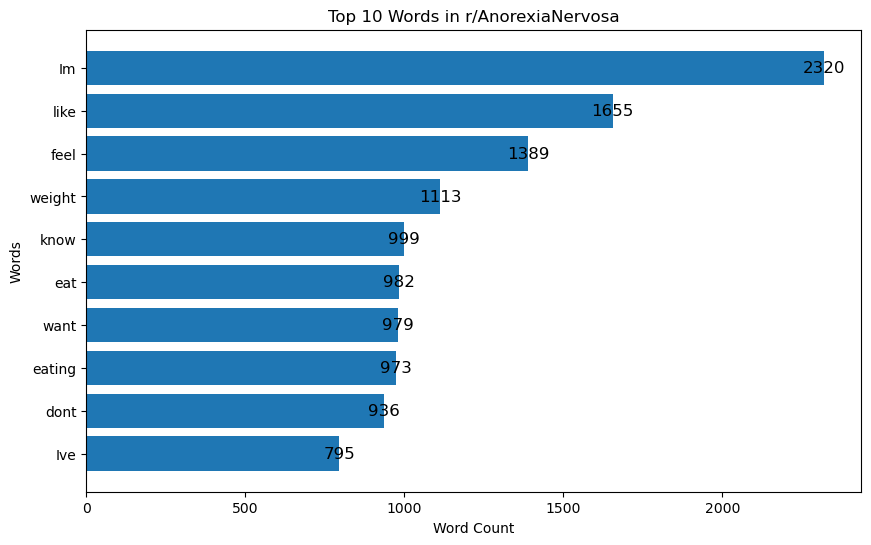

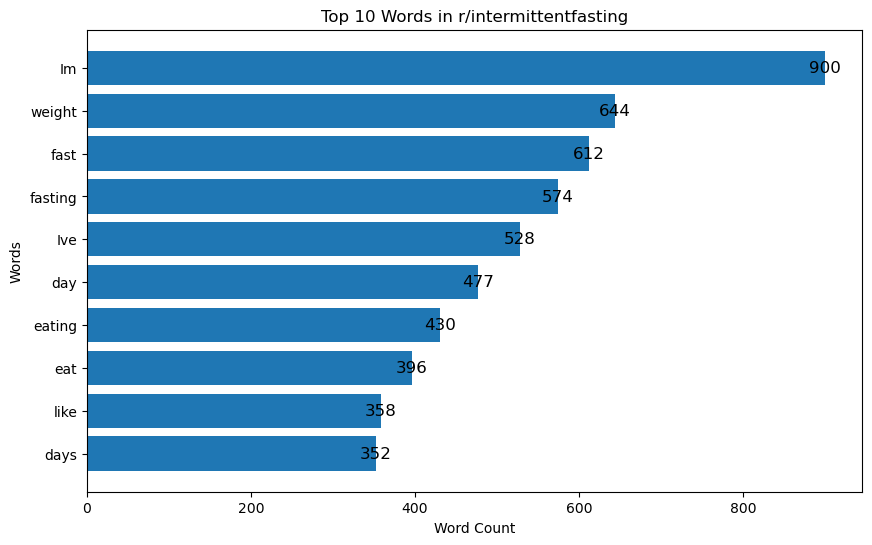

In [51]:
# Create a bar chart for the top 10 words in each subreddit
for subreddit, word_counts in combined_unigrams_count_dict.items():
    top_words = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:10])
    words, counts = zip(*top_words.items())

    plt.figure(figsize=(10, 6))
    bars = plt.barh(words, counts)
    plt.title(f"Top 10 Words in r/{subreddit}")
    plt.xlabel("Word Count")
    plt.ylabel("Words")
    plt.gca().invert_yaxis()  # Reverse the order of words for better visualization

    # Add labels for the bar values at the center of each bar
    for word, count in zip(words, counts):
        plt.text(count, word, str(count), ha='center', va='center', fontsize=12, color='black')

    plt.show()